## Decision tree classifier cheat sheet

In [61]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [62]:
# load data from scikit-learn
data = load_breast_cancer()
df = pd.DataFrame(data=data["data"],columns = data["feature_names"])

In [63]:
# this is clean and prepared dataset to predict if person might have cancer or not, generally you don't need to 
# get to know each feature, these are some complicated measurements related to cancer, the goal of this notebook
# is to make cheat sheet for DecisionTreeClassifier
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [64]:
# define X - independent variables, y - dependent variables
X = df
y = data["target"]

In [65]:
# import function for spliting data into training set and testing set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
tree = DecisionTreeClassifier(random_state=1)

In [68]:
# training the model
tree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

In [69]:
# decision tree visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

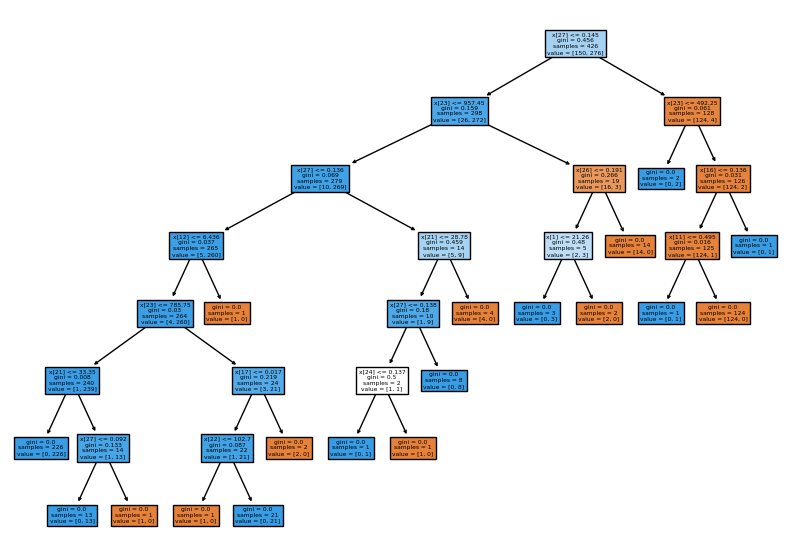

In [70]:
plt.figure(figsize = (10,7))
plot_tree(tree,filled=True)
plt.show()

In [71]:
prediction = tree.predict(test_X)

#### Model evaluation

In [72]:
# prediction on training data
training_pred = tree.predict(train_X)

In [73]:
# calculate accuracy - what % of guesses were right
from sklearn.metrics import accuracy_score
print(f"Accuracy on testing data: {accuracy_score(prediction,test_y)}")
print(f"Accuracy on training data: {accuracy_score(training_pred,train_y)}")

Accuracy on testing data: 0.9300699300699301
Accuracy on training data: 1.0


The result suggests overfitting

In [74]:
# calculate precision score - what % of "positive" guesses were right -  "true positive"/("true positive"+"false positive")
from sklearn.metrics import precision_score
precision_score(prediction,test_y)

0.9506172839506173

In [75]:
# calculate recall score - what % of "ture positive" guesses were found - "true positive"/("true positive"+"false negative")
from sklearn.metrics import recall_score
recall_score(prediction,test_y)

0.927710843373494

In [76]:
# calculate F1 score - balance between precision and recall - 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1_score(prediction,test_y)

0.9390243902439024

In [77]:
# display confusion matrix - columns(actual values) = positive, negative - rows(predicted values) = positive, negative
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction,test_y)

array([[56,  4],
       [ 6, 77]], dtype=int64)

In [78]:
# summary report includin precision, recall, F1 score, support(amount of samples for each class(1 or 0 )),
# accuracy, macro avg (avarage of precision or recall or f1-score reults for 1 and 0), weighted avg (weighted avarage
# where weight is based on amount of samples for each class)
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(prediction,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903226,0.950617,0.93007,0.926922,0.930733
recall,0.933333,0.927711,0.93007,0.930522,0.930070
f1-score,0.918033,0.939024,0.93007,0.928529,0.930217
support,60.000000,83.000000,0.93007,143.000000,143.000000


After the model is evaluated, we might try to improve it by experimenting with hyperparameters

In [79]:
# current depth is 6
tree.get_depth()

7

In [80]:
# let's see the results for one depth less
tree_2 = DecisionTreeClassifier(max_depth=5,random_state=1)

In [81]:
tree_2.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [82]:
pred_2 = tree_2.predict(test_X)

In [84]:
pd.DataFrame(classification_report(pred_2,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903226,0.962963,0.937063,0.933094,0.938316
recall,0.949153,0.928571,0.937063,0.938862,0.937063
f1-score,0.925620,0.945455,0.937063,0.935537,0.937271
support,59.000000,84.000000,0.937063,143.000000,143.000000


It seems like the model with lower max_depth performs better, it might indicate that previous model was more overfit

#### Bias and variance of new model

In [85]:
pred_2_training = tree_2.predict(train_X)

In [87]:
pd.DataFrame(classification_report(pred_2_training,train_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.973333,0.996377,0.988263,0.984855,0.988425
recall,0.993197,0.985663,0.988263,0.989430,0.988263
f1-score,0.983165,0.990991,0.988263,0.987078,0.988290
support,147.000000,279.000000,0.988263,426.000000,426.000000


As we can see compared to the first model accuracy of predictions on training data has lowered, so the bias increased, and we had better results for testing data than in first model, so the variance lowered. This is the goal of model selection, to find balance between bias and variance.

Let's just play with other parameters and measure different performances

In [88]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [92]:
tree_3 = DecisionTreeClassifier(criterion="entropy",random_state=1).fit(train_X,train_y)
tree_4 = DecisionTreeClassifier(max_depth=4,random_state=1).fit(train_X,train_y)
tree_5 = DecisionTreeClassifier(min_samples_split=5,random_state=1).fit(train_X,train_y)
tree_6 = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=5,random_state=1).fit(train_X,train_y)

In [95]:
pred_3 = tree_3.predict(test_X)
pred_4 = tree_4.predict(test_X)
pred_5 = tree_5.predict(test_X)
pred_6 = tree_6.predict(test_X)

In [97]:
pd.DataFrame(classification_report(pred_3,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.935484,0.950617,0.944056,0.943051,0.944056
recall,0.935484,0.950617,0.944056,0.943051,0.944056
f1-score,0.935484,0.950617,0.944056,0.943051,0.944056
support,62.000000,81.000000,0.944056,143.000000,143.000000


In [98]:
pd.DataFrame(classification_report(pred_4,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.919355,0.962963,0.944056,0.941159,0.944666
recall,0.950000,0.939759,0.944056,0.944880,0.944056
f1-score,0.934426,0.951220,0.944056,0.942823,0.944173
support,60.000000,83.000000,0.944056,143.000000,143.000000


In [99]:
pd.DataFrame(classification_report(pred_5,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.903226,0.950617,0.93007,0.926922,0.930733
recall,0.933333,0.927711,0.93007,0.930522,0.930070
f1-score,0.918033,0.939024,0.93007,0.928529,0.930217
support,60.000000,83.000000,0.93007,143.000000,143.000000


In [101]:
pd.DataFrame(classification_report(pred_6,test_y,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.919355,0.938272,0.93007,0.928813,0.93007
recall,0.919355,0.938272,0.93007,0.928813,0.93007
f1-score,0.919355,0.938272,0.93007,0.928813,0.93007
support,62.000000,81.000000,0.93007,143.000000,143.00000


Overall tree_2 seems to be the best model